## Primer: zimske olimpijske igre, Soči 2014

In [ ]:
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")

import matplotlib.pyplot as plt
import numpy
import pandas as pd
data = pd.read_table('../data/athletes.tab', skiprows=[1])

##### Odgovor 2-3-1

In [2]:
import numpy as np
def pearson(x, y):
    return np.mean(((x - np.mean(x))*(y-np.mean(y)))/(np.std(x)*np.std(y)))

In [3]:
x = data['height']
y = data['weight']
pearson(x,y)

0.830746584862724

##### Odgovor 2-3-2

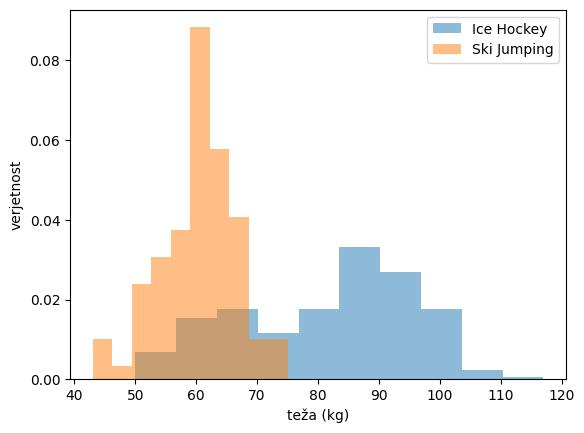

In [4]:
data_subset = data.loc[data['sport'] == 'Ice Hockey']
weights = data_subset['weight']
plt.hist(weights, density=True, bins=10, label="Ice Hockey", alpha=0.5)

data_subset = data.loc[data['sport'] == 'Ski Jumping']
weights = data_subset['weight']
plt.hist(weights, density=True, bins=10, label="Ski Jumping", alpha=0.5)

plt.xlabel('teža (kg)')
plt.ylabel('verjetnost')
plt.legend();

##### Odgovor 2-3-3

In [5]:
countries = pd.unique(data['country'])
gender_by_country = dict()

for country in countries:
    # Filter by countries
    data_subset = data.loc[data['country'] == country]

    # Filter males
    data_subset_male = data_subset.loc[data['gender'] == 'Male']
    # Filter females
    data_subset_female = data_subset.loc[data['gender'] == 'Female']

    # Store gender counts
    gender_by_country[country] = {
        'Male': len(data_subset_male),
        'Female': len(data_subset_female),
    }

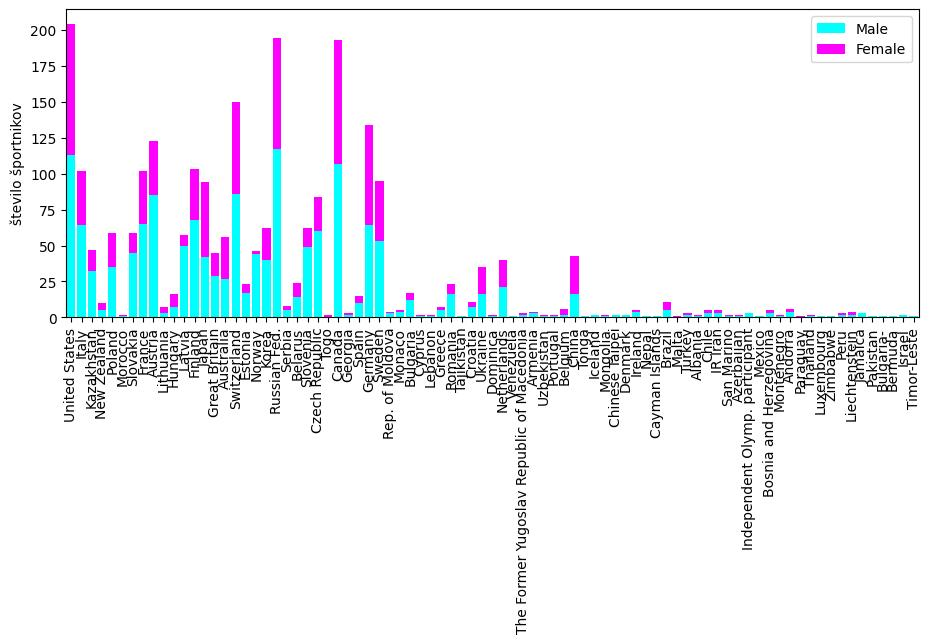

In [6]:
m = [gender_by_country[country]['Male'] for country in countries]
f = [gender_by_country[country]['Female'] for country in countries]
x = range(len(countries))

plt.figure(figsize=(11, 4))
plt.bar(x, m, color='cyan', align='center', label="Male")
plt.bar(x, f, bottom=m, color='magenta', align='center', label="Female")
plt.xlim(-0.5, len(countries)-0.5)
plt.xticks(x)
plt.gca().set_xticklabels(countries, rotation=90)
plt.ylabel('število športnikov')

plt.legend();

##### Odgovor 2-3-4

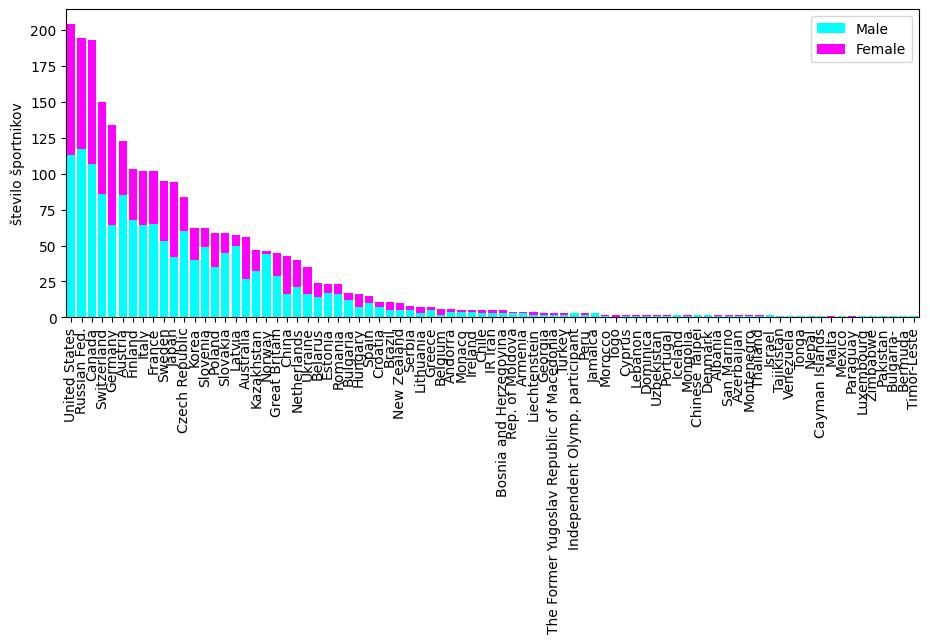

In [7]:
countries = filter(lambda c: sum([gender_by_country[c][m] for m in gender_by_country[c].keys()]), countries)
countries = sorted(countries, key=lambda c: -sum([gender_by_country[c][m] for m in gender_by_country[c].keys()]))


m = [gender_by_country[country]['Male'] for country in countries]
f = [gender_by_country[country]['Female'] for country in countries]
x = range(len(countries))

plt.figure(figsize=(11, 4))
plt.bar(x, m, color='cyan', align='center', label="Male")
plt.bar(x, f, bottom=m, color='magenta', align='center', label="Female")
plt.xlim(-0.5, len(countries)-0.5)
plt.xticks(x)
plt.gca().set_xticklabels(countries, rotation=90)
plt.ylabel('število športnikov')

plt.legend();

##### Odgovor 2-3-5

Najprej izračunamo distribucijo vrednosti.

In [8]:
# barve medalj
gold_color = "#FFDF00"
silv_color = "#C0C0C0"
bron_color = "#CD7F32"

# pripravi podatke ; shrani št. medalj za vsako državo in šport
countries = pd.unique(data['country'])

# preštej medalje
medals_by_country = dict()
for country in countries:
    medals_by_country[country] = dict()
    data_subset = data.loc[data['country'] == country]
    medals_by_country[country] = {
        "gold":   data_subset.loc[:, 'gold_medals'].sum(),
        "silver": data_subset.loc[:, 'silver_medals'].sum(),
        "bronze": data_subset.loc[:, 'bronze_medals'].sum(),
}                    

Nato distribucijo narišemo.

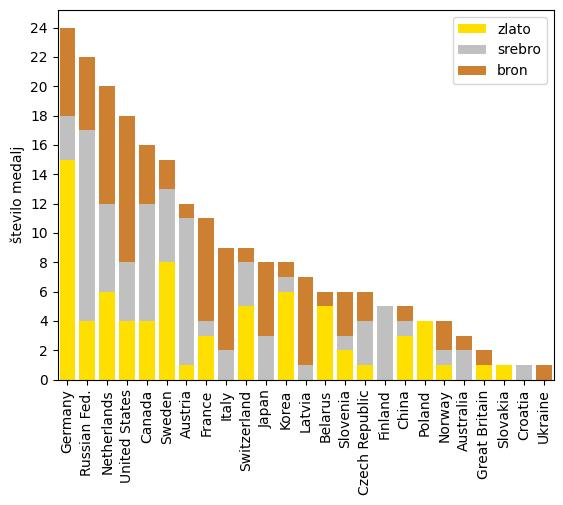

In [9]:
countries = filter(lambda c: sum([medals_by_country[c][m] for m in medals_by_country[c].keys()]), countries)
countries = sorted(countries, key=lambda c: -sum([medals_by_country[c][m] for m in medals_by_country[c].keys()]))
gx = numpy.array([medals_by_country[c]["gold"] for c in countries])
sx = numpy.array([medals_by_country[c]["silver"] for c in countries])
bx = numpy.array([medals_by_country[c]["bronze"] for c in countries])
x = range(len(countries))

plt.bar(x, gx, align="center", color=gold_color, label="zlato")
plt.bar(x, sx, align="center", bottom=gx, color=silv_color, label="srebro")
plt.bar(x, bx, align="center", bottom=gx+sx, color=bron_color, label="bron")
plt.xlim(-0.5, len(x)-0.5)
plt.legend()
plt.xticks(x)
plt.yticks(range(0, 25, 2))
plt.gca().set_xticklabels(countries, rotation=90)
plt.ylabel("število medalj")
plt.savefig('slike/odgovori/2-2-7.png', bbox_inches='tight')

##### Odgovor 2-3-6

In [10]:
# priprava podatkov
# teža in višina glede na sport; sport se nahaja v 8 stolpcu
sports = pd.unique(data['sport'])
weights_by_sport = dict()
heights_by_sport = dict()
ages_by_sport = dict()

for sport in sports:
    data_subset = data.loc[data['sport'] == sport]
    
    w = data_subset.loc[:,'weight'].values
    h = data_subset.loc[:,'height'].values
    a = data_subset.loc[:,'age'].values
    
    weights_by_sport[sport] = w
    heights_by_sport[sport] = h
    ages_by_sport[sport]    = a

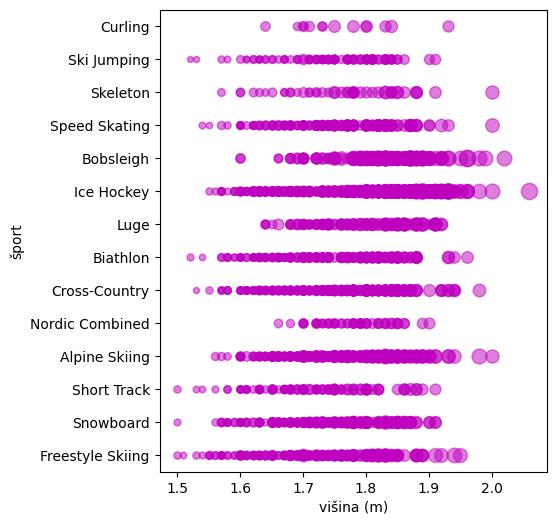

In [11]:
plt.figure(figsize=(5, 6))

for si, sport in enumerate(sports):
    xs = heights_by_sport[sport]    # x os
    ys = [si for x in xs]           # y os je v visini sporta
    zs = weights_by_sport[sport]    # velikost točke je premosorazmerna s tezo
    
    for x, y, z in zip(xs, ys, zs): # rišemo točko po točko
        plt.plot(x, y, "m.", alpha=0.5, markersize=z/5)
            
plt.yticks(range(len(sports)))
plt.ylim(-0.5, len(sports)-0.5)
plt.gca().set_yticklabels(sports)
        
plt.xlabel("višina (m)")
plt.ylabel("šport");
plt.savefig('slike/odgovori/2-2-8.png', bbox_inches='tight')

##### Odgovor 2-3-7

Priprava podatkov - teža in višina glede na sport (sport se nahaja v 8 stolpcu)

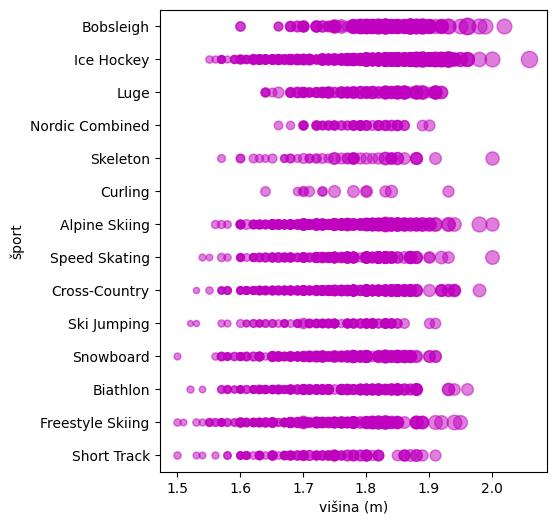

In [12]:
plt.figure(figsize=(5, 6))

sport_order = []
for si, sport in enumerate(sports):
    xs = heights_by_sport[sport]    # x os
    sport_order.append((numpy.average(xs), si))
sport_order.sort()

sport_label = []
for nsi, (avg_xs, si) in enumerate(sport_order):
    sport = sports[si]
    sport_label.append(sport)
    
    xs = heights_by_sport[sport]    # x os
    ys = [nsi for x in xs]          # y os je v visini sporta
    zs = weights_by_sport[sport]    # velikost točke je premosorazmerna s tezo
    
    for x, y, z in zip(xs, ys, zs): # rišemo točko po točko
        plt.plot(x, y, "m.", alpha=0.5, markersize=z/5)
        
    plt.plot(avg_xs, nsi, 'k', markersize=1)
            
plt.yticks(range(len(sports)))
plt.ylim(-0.5, len(sports)-0.5)
plt.gca().set_yticklabels(sport_label)
        
plt.xlabel("višina (m)")
plt.ylabel("šport");